In [21]:
# Read amz_uk_price_prediction_dataset.csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Parte 1

In [22]:
# Create a crosstab between the product category and the isBestSeller status
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [23]:
# Convertir la columna 'isBestSeller' a booleano si es necesario
df['isBestSeller'] = df['isBestSeller'].astype(bool)

# Crear una tabla cruzada entre 'category' e 'isBestSeller'
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calcular la proporción de best-sellers por categoría
crosstab['Proporción_BestSellers'] = crosstab[True] / (crosstab[True] + crosstab[False]) * 100

# Ordenar por la proporción de best-sellers en orden descendente
crosstab_sorted = crosstab.sort_values(by='Proporción_BestSellers', ascending=False)

# Mostrar los resultados
crosstab_sorted

isBestSeller,False,True,Proporción_BestSellers
category,,,
Grocery,9008,556,5.813467
Smart Home Security & Lighting,98,6,5.769231
Health & Personal Care,9017,552,5.768628
Mobile Phone Accessories,248,11,4.247104
Power & Hand Tools,8353,306,3.533895
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [24]:
# Conduct a Chi-square test
chi2, p, dof, ex = chi2_contingency(crosstab.iloc[:, :-1])

print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Compute Cramér's V
n = crosstab.sum().sum()
cramers_v = math.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

print(f"Cramér's V: {cramers_v}")

Chi-square test statistic: 36540.20270061387
P-value: 0.0
Degrees of freedom: 295
Cramér's V: 0.08646387271813517


In [49]:
# Definir un umbral de outliers (percentil 95)
outlier_threshold = crosstab.max(axis=1).quantile(0.95)

# Filtrar las categorías con valores por encima del umbral
filtered_crosstab = crosstab[crosstab.max(axis=1) < outlier_threshold]

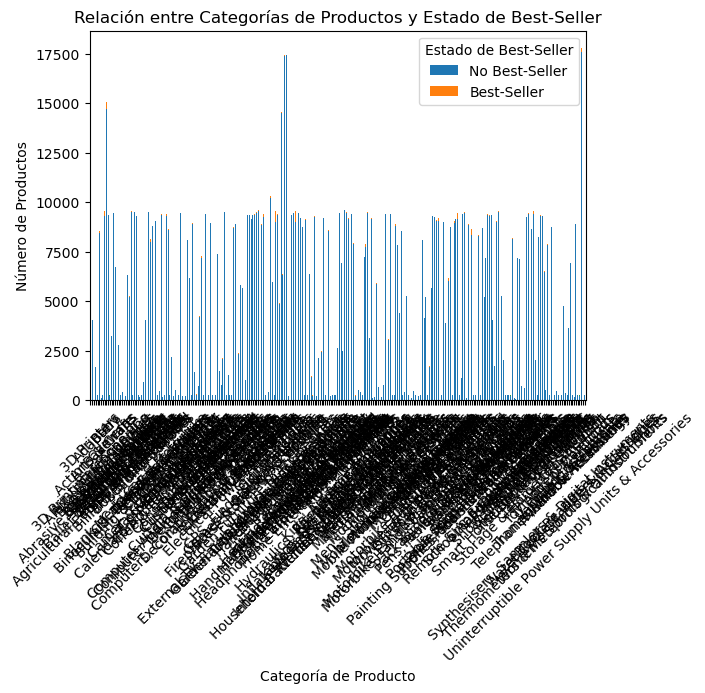

In [50]:
# Graficar el gráfico de barras apiladas
filtered_crosstab.plot(kind='bar', stacked=True)

# Configurar etiquetas y título
plt.xlabel("Categoría de Producto")
plt.ylabel("Número de Productos")
plt.title("Relación entre Categorías de Productos y Estado de Best-Seller")
plt.xticks(rotation=45)
plt.legend(["No Best-Seller", "Best-Seller"], title="Estado de Best-Seller")

# Mostrar el gráfico
plt.show()

# Parte 2

In [27]:
# 0. **Preliminary Step: Remove outliers in product prices.**
# For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
# *Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

# Calculate the first and third quartiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove the outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Display the number of outliers removed
outliers_removed = len(df) - len(df_filtered)
print(f"Number of outliers removed: {outliers_removed}")

Number of outliers removed: 327688


C:\Users\jesus\AppData\Local\Temp\ipykernel_20948\2125249574.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='category', y='price', palette='viridis')


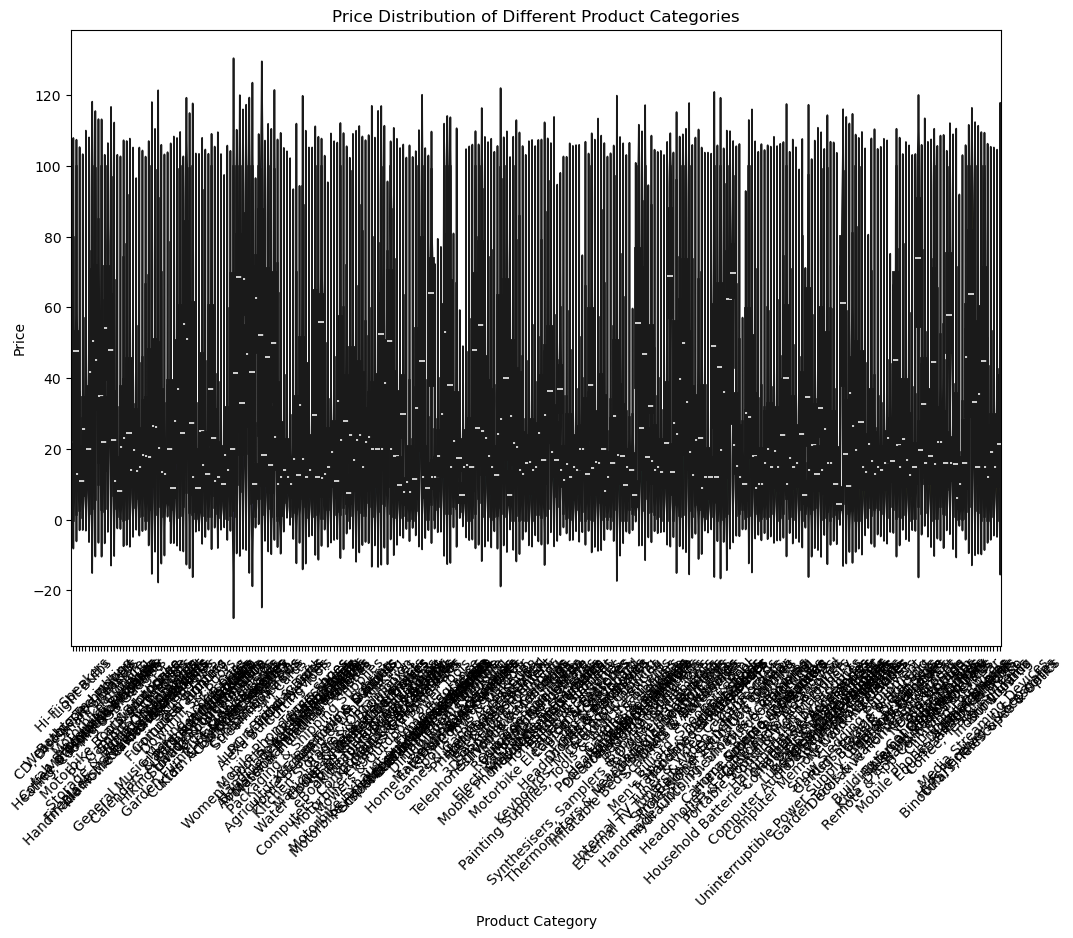

In [ ]:
# Use a violin plot to visualize the distribution of `price` across different product `categories`. 
# This plot will help us understand the price distribution of different product categories and identify any potential outliers.

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_filtered, x='category', y='price', palette='viridis')

# Set the title and labels
plt.title('Price Distribution of Different Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')

# Rotate the x-labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
# Which product category tends to have the highest median price?
# Don't filter here by top categories.

# Filtered dataset is df_filtered
# Calculate the median price for each category
median_price_by_category = df_filtered.groupby('category')['price'].median().sort_values(ascending=False)

# Display the median price by category
median_price_by_category

# "Desktop PCs" tend to have the highest median price among the product categories.


category
Desktop PCs              74.00
Boxing Shoes             69.79
Tablets                  69.00
Graphics Cards           68.54
Motherboards             67.92
                         ...  
Adapters                  7.05
Make-up                   7.00
Signs & Plaques           6.99
Arts & Crafts             5.99
Office Paper Products     4.37
Name: price, Length: 296, dtype: float64

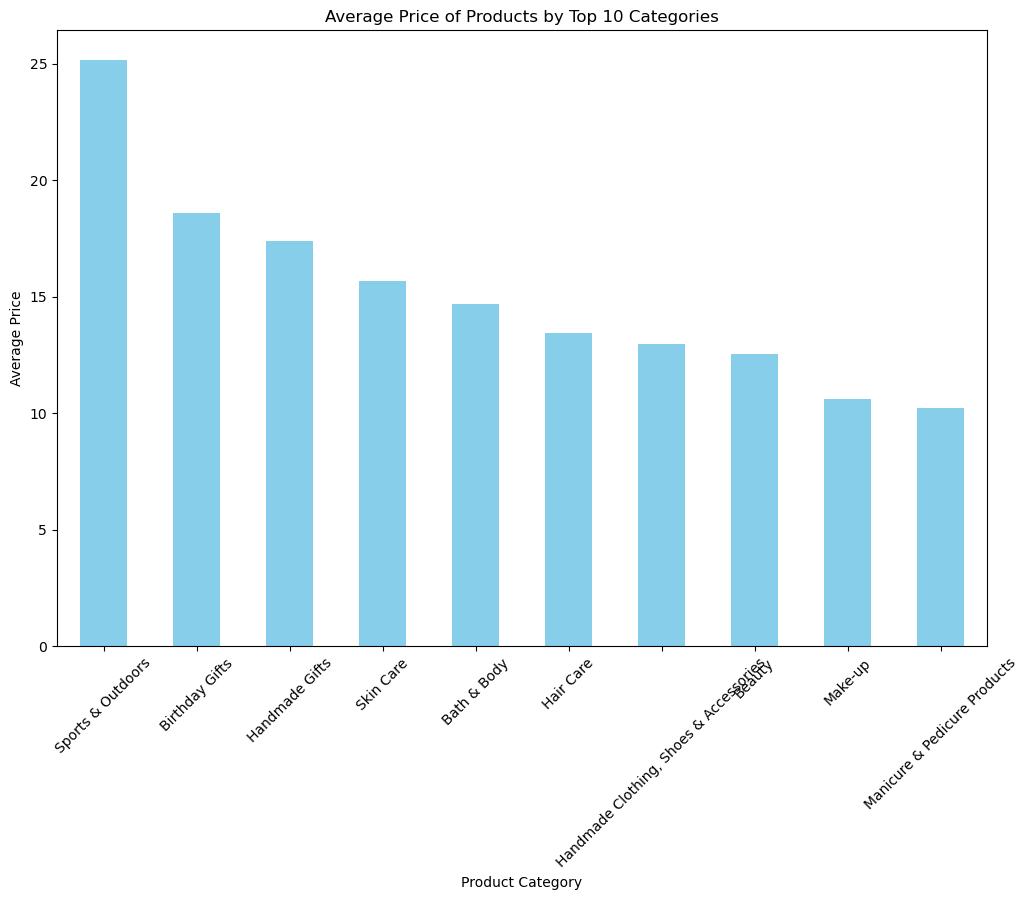

In [32]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count)
# Filter the dataset to include only the top 10 product categories based on the count of products
top_categories = df_filtered['category'].value_counts().head(10).index

# Filter the dataset to include only the top categories
df_top_categories = df_filtered[df_filtered['category'].isin(top_categories)]

# Calculate the average price for each category
average_price_by_category = df_top_categories.groupby('category')['price'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
average_price_by_category.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Average Price of Products by Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')

# Rotate the x-labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
# Which product category commands the highest average price? 
# Don't filter here by top categories.

# Sports & Outdoors has the highest average price among the top 10 categories.

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_filtered is already defined
# Create a side-by-side box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, x='category', y='rating', palette='viridis')

# Set the title and labels
plt.title('Distribution of Ratings by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Rating')

# Rotate the x-labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

ValueError: Could not interpret value `rating` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>